# Create


In [138]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *


In [139]:
%matplotlib widget


In [140]:
ac = 0.00081271 # should be:0.81271 # 8.1271e-15 # scattering radius in 1e-12 cm # arbitrary decrease in magnitude
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity
l_max = 12      # highest order l-wave to consider

Ta_pair = syndat.particle_pair(ac, M, m, I, i, l_max)

Ta_pair.map_quantum_numbers(False)


In [141]:
# average_parameters, parameters = syndat.sammy_interface.read_sammy_par('../synthetic_data/Ta181/endf_eval/SAMQUA.PAR')
# # print(average_parameters);# print(parameters)

# # size of these averages must be the same size as Jpi mapping!\
# Davg = [list([average_parameters.dE[1]])*len(pair.Jn), list([average_parameters.dE[1]])*len(pair.Jp)]
# Ggavg = [list([average_parameters.Gg[1]])*len(pair.Jn), list([average_parameters.Gn[1]])*len(pair.Jp)]
# Gnavg = [list([average_parameters.Gn[1]])*len(pair.Jn), list([average_parameters.Gn[1]])*len(pair.Jp)]
# # Davg = [list(), list([average_parameters.dE[1],average_parameters.dE[2]])]
# # Ggavg = [list(), list([average_parameters.Gg[1],average_parameters.Gg[2]])]
# # Gnavg = [list(), list([average_parameters.Gn[1],average_parameters.Gn[2]])]

# RRR_Erange = [10, 50]

# pair.sample_all_Jpi(RRR_Erange, 
#                         Davg, Ggavg, Gnavg,
#                         save_csv = False, 
#                         sammy_run_folder = os.getcwd())

# pair.map_quantum_numbers(True)

In [142]:

# pair.Jp[0][0]
# ### !!! need to correct the way pair.Jp/Jn are stored so that I can loop through even just a single spin group!
# test = [[3.0, 1, [0.0]],]

# for j in test:
#     print(j[0])
# # for j, resonance_ladder in zip(pair.Jp[0], pair.Jp_resonances):
# #     print(j[0], resonance_ladder)
# resonance_ladder = pd.DataFrame({'E':[21.54920000,41.91070000], 'Gg':[82.0092930,124.412524], '0':[0.23514800,0.25549100]}) 
# test = pair.Jp_resonances



# np.sqrt(E/E_lambda)
# np.sqrt(E/E_lambda) - (np.sqrt(E**3/E_lambda**3))


## Analysis for Ta181



In [173]:
sammy_scat = syndat.sammy_interface.readlst('/Users/noahwalton/research_local/resonance_fitting/synthetic_data/verify_slbw/SAMMY.LST')
sammy_cap = syndat.sammy_interface.readlst('/Users/noahwalton/research_local/resonance_fitting/synthetic_data/verify_slbw/SAMMY_capture.LST')
sammy_total = syndat.sammy_interface.readlst('/Users/noahwalton/research_local/resonance_fitting/synthetic_data/verify_slbw/SAMMY_tot.LST')
# test = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/verify_slbw/SAMMY.LST')
E = sammy_scat.E


g = syndat.scattering_theory.g(3, Ta_pair.I, Ta_pair.i) #(2*J+1)/( (2*ii+1)*(2*I+1) );   # spin statistical factor g sub(j alpha)
k = syndat.scattering_theory.k_wavenumber(E,Ta_pair.M, Ta_pair.m) # syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
rho = k*ac
psi = rho

## MLBW with syndat
# my_resonance_ladder = [pd.DataFrame({'E':[21.54920000,41.91070000], 'Gg':[82.0092930,124.412524], '0':[0.23514800,0.25549100]}), ]
my_resonance_ladder = [pd.DataFrame({'E':[21.54920000], 'Gg':[82.0092930], '0':[0.23514800]}), ]
xs_cap_MLBW = syndat.scattering_theory.SLBW_capture(g, k, E, my_resonance_ladder[0])


E_lambda = 21.54920000
Gn = 0.23514800*1e-3 # * np.sqrt(E/E_lambda)* 1e-3
gn = np.sqrt(Gn/2/syndat.scattering_theory.k_wavenumber(E_lambda,Ta_pair.M, Ta_pair.m)/ac)
Gn = 2*rho*(gn**2)
Gg = 82.0092930 * 1e-3

## RM raw implementation
G = Gn+Gg
d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
xs_tot = (4*np.pi*g/k**2) * ( 1-(1-G*Gn/2/d)*np.cos(2*psi*np.pi/180) - (E-E_lambda)*Gn/d*np.sin(2*psi*np.pi/180) ) 
# xs_tot = (4*np.pi*g/k**2) * ( np.sin(psi*np.pi/180)**2 + G*Gn/4/d*np.cos(2*psi*np.pi/180) - (E-E_lambda)*Gn/2/d*np.sin(2*psi*np.pi/180) ) 
xs_cap = (np.pi*g/k**2) * (Gn*Gg/d)
xs_scat = (2*np.pi*g/k**2) * ( 1-np.cos(2*psi*np.pi/180)*(1-G*Gn/2/d) - np.sin(2*psi*np.pi/180)**2*(E-E_lambda)*Gn/d - Gn*Gg/2/d )
# xs_scat = (4*np.pi*g/k**2) * ( np.sin(psi*np.pi/180)**2*(1-2*G*Gn/4/d) - (E-E_lambda)*Gn/2/d*np.sin(2*psi*np.pi/180) + (G*Gn/4/d)**2 + ((E-E_lambda)*Gn/2/d)**2)

## MLBW raw implementation
# d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
# GG_d = Gn*(Gn+Gg)/d
# GE_d = Gn*(E-E_lambda)/d
# xs_scat = (np.pi*g/k**2) * ((1-np.cos(2*psi))*(2-GG_d) + 2*np.sin(2*psi)*GE_d + GE_d**2 + (GG_d/2)**2)

# xs_tot = xs_scat + xs_cap


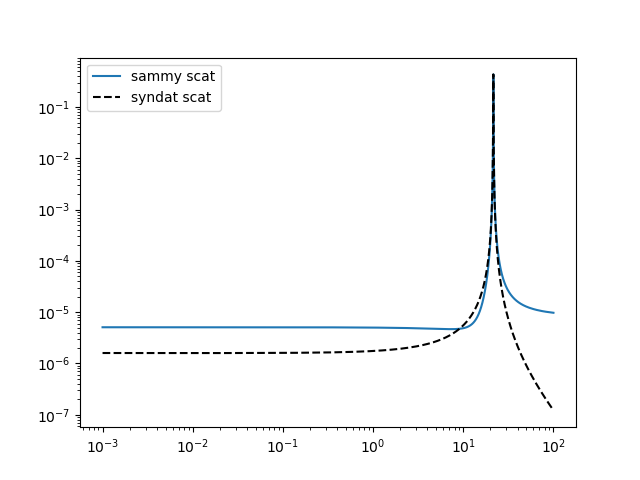

In [176]:

figure()

plot(sammy_scat.E, sammy_scat.theo_xs, label='sammy scat')
plot(E,xs_scat, '--k', label='syndat scat') 

# # plot(test.E, test.exp_dat, label='sammy')
# # # plot(E,1.4e-2/E, 'c', label='1/E')
# # plot(E,3e-3/np.sqrt(E), 'orange', label='1/sqrt(E)')
# # plot(E, xs_scat-sammy_calculated.theo_xs)

# plot(sammy_cap.E, sammy_cap.theo_xs, label='sammy cap')
# plot(E,xs_cap,'--k', label='syndat cap', color='k')
# # plot(E,xs_cap-sammy_cap.theo_xs, 'c', label='1/E')

# plot(sammy_total.E, sammy_total.theo_xs, label='sammy tot')
# plot(E,xs_tot, '--k', label='syndat tot')
# plot(E, (xs_tot-sammy_total.theo_xs))



xscale('log')
yscale('log')
# ylim([1e-3,5e2])
# xlim([1e1,5e1])

# xlabel("Energy")
# ylabel("Experimental Cross Section")
# title("Fitting Procedure")
legend()

In [168]:
xs_cap


0       3.656546e-04
1       1.103464e-04
2       7.993692e-05
3       6.585359e-05
4       5.731549e-05
            ...     
9995    8.734332e-08
9996    8.731668e-08
9997    8.729004e-08
9998    8.726342e-08
9999    8.723681e-08
Name: E, Length: 10000, dtype: float64

In [169]:


# # E = sammy_cap.E
# # my_resonance_ladder = [pd.DataFrame({'E':[2105.151608],'Gg':[506.740813], 'Gn':[20317.7426]}), ]
# # single_spin_group = [[1.0, 1, [0.0]],]

# # resonance_ladder = pair.Jp_resonances[0]
# # E = sammy_calculated.E[sammy_calculated.E<100] #np.linspace(1,100,1000)
# my_resonance_ladder = [pd.DataFrame({'E':[21.54920000], 'Gg':[82.0092930], '0':[0.23514800]}), ]
# # my_resonance_ladder = [pd.DataFrame({'E':[21.54920000,41.91070000], 'Gg':[82.0092930,124.412524], '0':[0.23514800,0.25549100]}), ] # make this a list so it can be looped through
# # 41.91070000 124.412524 0.25549100 0.00000000 0.00000000 0 0 0 0 0 1
# # single_spin_group = [[3.0, 1, [0.0]],]  # make this a list so it can be looped through

# k = syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
# P,S,psi = syndat.scattering_theory.P_S_psi_explicit(E, pair.ac, pair.M, pair.m, 0)


# # xs_cap = 0 

# # # for j, resonance_ladder in zip(pair.Jp, pair.Jp_resonances):
# # for j, resonance_ladder in zip(single_spin_group, my_resonance_ladder):
# #     # print(j[0], resonance_ladder)
# #     g = syndat.scattering_theory.g(j[0], pair.I, pair.i)
# #     xs_cap += syndat.scattering_theory.SLBW_capture(g, k, E, resonance_ladder)



# xs_scat = 0 

# # for j, resonance_ladder in zip(pair.Jp, pair.Jp_resonances):
# for j, resonance_ladder in zip(single_spin_group, my_resonance_ladder):
#     # print(j[0], resonance_ladder)
#     g = syndat.scattering_theory.g(j[0], pair.I, pair.i)

#     sum1=0; sum2=0; sum3=0; sum4=0
#     for index, row in resonance_ladder.iterrows():
#         Gn = sum([row[ign] for ign in range(2,len(row))]) * 1e-3
#         Gg = row.Gg * 1e-3
#         E_lambda = row.E
#         d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
#         sum1 += Gn*(Gn+Gg)/d
#         sum2 += Gn*(E-E_lambda)/d
#         sum3 += (Gn*(E-E_lambda)/d)#**2
#         sum4 += (Gn*(Gn+Gg)/(2*d))#**2

#     xs_scat += g * ((1-np.cos(2*psi))*(2-sum1) + 2*np.sin(2*psi)*sum2 + sum3**2 + sum4**2)

# xs_scat = (np.pi/k**2)*xs_scat

# xs_scat = 0 
# k = syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
# P,S,psi = syndat.scattering_theory.P_S_psi_explicit(E, pair.ac, pair.M, pair.m, 0)
# # for j, resonance_ladder in zip(pair.Jp, pair.Jp_resonances):
# for j, resonance_ladder in zip(single_spin_group, my_resonance_ladder):
#     # print(j[0], resonance_ladder)
#     g = syndat.scattering_theory.g(j[0], pair.I, pair.i)
#     sum1=0; sum2=0; sum3=0; sum4=0
#     for index, row in resonance_ladder.iterrows():
#         Gn = sum([row[ign] for ign in range(2,len(row))]) * 1e-3
#         Gg = row.Gg * 1e-3
#         E_lambda = row.E
#         d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
#         sum1 += Gn*(Gn+Gg)/d
#         sum2 += Gn*(E-E_lambda)/d
#         sum3 += Gn*(E-E_lambda)/d
#         sum4 += Gn*(Gn+Gg)/(2*d)
#     xs_scat += g * (1-np.cos(2*psi))*(2-sum1) + 2*np.sin(2*psi)*sum2 + sum3**2 + sum4**2
# xs_scat = (np.pi/k**2)*xs_scat





In [170]:
# figure()

# plot(E, xs_scat, label='syndat')
# plot(sammy_calculated.E, sammy_calculated.theo_xs, label='sammy')

# xscale('log')
# yscale('log')
# legend()



## Analysis for single resonance of Copper-63

In [148]:

sammy_cap = syndat.sammy_interface.readlst('/Users/noahwalton/research_local/resonance_fitting/synthetic_data/verify_slbw/cu/SAMMY_capture.LST')
sammy_scat = syndat.sammy_interface.readlst('/Users/noahwalton/research_local/resonance_fitting/synthetic_data/verify_slbw/cu/SAMMY_scat.LST')
sammy_scat_RM = syndat.sammy_interface.readlst('/Users/noahwalton/research_local/resonance_fitting/synthetic_data/verify_slbw/cu/SAMMY_scat_RM.LST')
sammy_cap_RM = syndat.sammy_interface.readlst('/Users/noahwalton/research_local/resonance_fitting/synthetic_data/verify_slbw/cu/SAMMY.LST')
E = sammy_cap.E

# test = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/verify_slbw/cu/SAMMY.LST')
# E = test.E


M = 62.929599; # Cu-63, number from cu63 input txt file
Constant = 0.002197 #sqrt(2Mn)/hbar; units of (10^(-12) cm sqrt(eV)^-1)
Ac = 0.67 ; # scattering radius 6.7 fermi expressed as 10^-12 cm
I = 1.5; # target angular Momentum
ii = 0.5; # incident angular momentum
l = 0;   # l=0 or s-wave spin group

pair = syndat.particle_pair(Ac, M, 1, I, ii, l)

g=syndat.scattering_theory.g(1, pair.I, pair.i) #(2*J+1)/( (2*ii+1)*(2*I+1) );   # spin statistical factor g sub(j alpha)
pig=np.pi*g 
k = Constant*(M/(M+1))*np.sqrt(E) # syndat.scattering_theory.k_wavenumber(E,pair.M,pair.m)
rho = k*Ac
psi = rho

# initialize and fill synthetic true 'continuous' cross section vector
my_resonance_ladder = [pd.DataFrame({'E':[2105.151608],'Gg':[506.740813], 'Gn':[20317.7426]}), ]


xs_cap = syndat.scattering_theory.SLBW_capture(g, k, E, my_resonance_ladder[0])




E_lambda = 2105.151608
Gn = 20317.7426 * np.sqrt(E/E_lambda)* 1e-3
Gg = 506.740813 * 1e-3

d = (E-E_lambda)**2 + ((Gg+Gn)/2)**2 
GG_d = Gn*(Gn+Gg)/d
GE_d = Gn*(E-E_lambda)/d

xs_scat = (np.pi*g/k**2) * ((1-np.cos(2*psi))*(2-GG_d) + 2*np.sin(2*psi)*GE_d + GE_d**2 + (GG_d/2)**2)



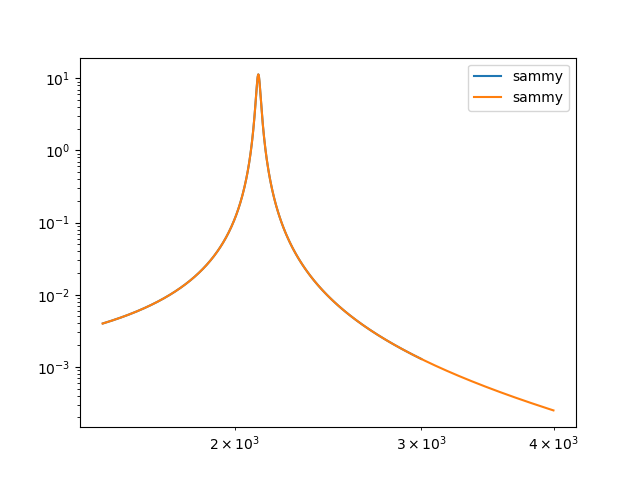

In [149]:
figure()

# plot(E, xs_scat) # +3.625
# plot(E,xs_cap,'o')

plot(sammy_cap_RM.E, sammy_cap_RM.theo_xs, label='sammy')
plot(sammy_cap.E, sammy_cap.theo_xs, label='sammy')

# plot(sammy_scat_RM.E, sammy_scat_RM.theo_xs, 'o',label='sammy')
# plot(sammy_scat.E, sammy_scat.theo_xs, label='sammy')

# plot(E, xs_scat-sammy_scat.theo_xs)

xscale('log'); 
yscale('log')
# xlim([1,1000])
legend()

In [150]:
N=1
nu = 2.88
gj = 3/4
E_lambda = 2.956243e-1
Gn = 7.947046e-5
Gg = 3.982423e-2
Gf = 5.619673e-2
ac = 9.410000e-4
rho0 = 0.002196807122623/2

Erange = np.logspace(-5, 7, 1000)
v = np.sqrt(Erange)


# sig_cap = (gj/k**2) * Gn*v/np.sqrt(E_lambda)*Gg/( (v**2-E_lambda)**2 +(Gn*v/E_lambda + Gg + Gf))

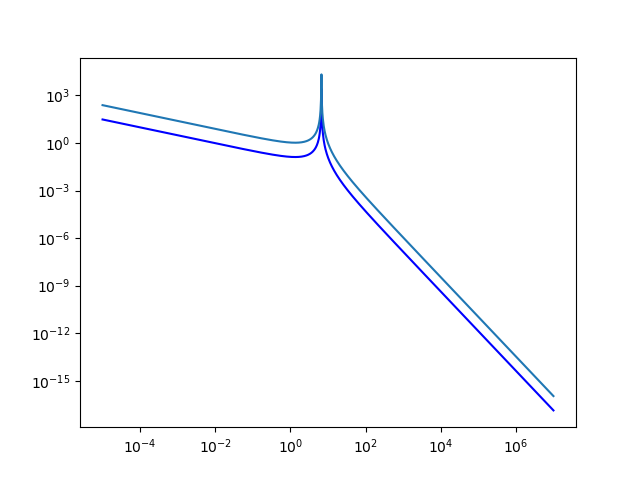

In [151]:
# 
# numerical input values for U 238

# atoms/(cm*barn)
N_U238 = 0.124954;
# dimensionless
nu_U238 = 0;
gj_U238 = 1;
# units in eV
E_lam_U238 = 6.674280;
Lam_np_U238 = 1.492300e-3;
Lam_gam_U238 = 2.271100e-2;
Lam_f_U238 = 9.88e-9;
# cm e-12
ac_U238 = 9.48e-4;
# 1/(10e-12*sqrt(eV))
p0_U238 = 0.002196807122623 * (1/2);

# 
# numerical input values for U 238

# atoms/(cm*barn)
N_Pu239 = 1;
# imensionless
nu_Pu239 = 2.88;
gj_Pu239 = 3/4;
# units in eV
E_lam_Pu239 = 2.956243e-1;
Lam_np_Pu239 = 7.947046e-5;
Lam_gam_Pu239 = 3.982423e-2;
Lam_f_Pu239 = 5.619673e-2;
# cm e-12
ac_Pu239 = 9.41e-4;
# 1/(10e-12*sqrt(eV))
p0_Pu239 = 0.002196807122623 * (1/2);


def sig_scat(E, E_lam, ac, gj, N, po, Lam_np, Lam_gam, Lam_f):

    Lam_n = Lam_np*np.sqrt(E/E_lam)
    Lam_t = Lam_n + Lam_gam + Lam_f
    d = (E - E_lam)**2 + (Lam_t/2)**2
    k = po*np.sqrt(E)
    p = k*ac

    cross_section = 4*np.pi*(ac**2)*N + (N*(gj*np.pi)/d)* (  (Lam_n**2/k**2) + ((4*ac*(E-E_lam)*Lam_n)/k) - (2*ac**2*Lam_n*Lam_t)  );
    return cross_section


def sig_f(E, E_lam, ac, gj, N, po, Lam_np, Lam_gam, Lam_f):

    Lam_n = Lam_np*np.sqrt(E/E_lam)
    Lam_t = Lam_n + Lam_gam + Lam_f
    d = (E - E_lam)**2 + (Lam_t/2)**2
    k = po*np.sqrt(E)
    p = k*ac

    cross_section = N * (gj*np.pi)/k**2 * (Lam_n*Lam_f)/d
    return cross_section


def sig_g(E, E_lam, ac, gj, N, po, Lam_np, Lam_gam, Lam_f):

    Lam_n = Lam_np*np.sqrt(E/E_lam)
    Lam_t = Lam_n + Lam_gam + Lam_f
    d = (E - E_lam)**2 + (Lam_t/2)**2
    k = po*np.sqrt(E)
    p = k*ac

    cross_section = N * (gj*np.pi)/k**2* (Lam_n*Lam_gam)/d
    return cross_section



# Erange = np.linspace

Pu_fis = sig_f(Erange, E_lam_Pu239, ac_Pu239, gj_Pu239, N_Pu239, p0_Pu239, Lam_np_Pu239, Lam_gam_Pu239, Lam_f_Pu239)
Pu_scat = sig_scat(Erange, E_lam_Pu239, ac_Pu239, gj_Pu239, N_Pu239, p0_Pu239, Lam_np_Pu239, Lam_gam_Pu239, Lam_f_Pu239)
Pu_cap = sig_g(Erange, E_lam_Pu239, ac_Pu239, gj_Pu239, N_Pu239, p0_Pu239, Lam_np_Pu239, Lam_gam_Pu239, Lam_f_Pu239)

U_scat = sig_scat(Erange, E_lam_U238, ac_U238, gj_U238, N_U238, p0_U238, Lam_np_U238, Lam_gam_U238, Lam_f_U238)
U_fis = sig_f(Erange, E_lam_U238, ac_U238, gj_U238, N_U238, p0_U238, Lam_np_U238, Lam_gam_U238, Lam_f_U238)
U_cap = sig_g(Erange, E_lam_U238, ac_U238, gj_U238, N_U238, p0_U238, Lam_np_U238, Lam_gam_U238, Lam_f_U238)
    
sum_fis = Pu_fis+U_fis
sum_scat = Pu_scat+U_scat
sum_cap = Pu_cap+U_cap

# syndat calculated
my_resonance_ladder = [pd.DataFrame({'E':[6.674280],'Gg':[2.271100e1], 'Gn':[1.492300e+0]}), ]
# xs_cap = syndat.scattering_theory.SLBW_capture(gj_Pu239, p0_Pu239*np.sqrt(Erange), Erange, my_resonance_ladder[0])
xs_cap = syndat.scattering_theory.SLBW_capture(gj_U238, p0_U238*np.sqrt(Erange), Erange, my_resonance_ladder[0])

figure()
# plot(Erange, sum_fis, color='purple')
# plot(Erange, sum_scat, '--', color='b')
# plot(Erange, sum_cap, color='k')

# plot(Erange, Pu_fis, color='purple')
# plot(Erange, Pu_scat, '--', color='b')
# plot(Erange, Pu_cap, color='k')
# plot(Erange, U_fis, color='b')
# plot(Erange, U_scat, '--', color='b')
plot(Erange, U_cap, color='b')

plot(Erange, xs_cap)
xscale('log')
yscale('log')



In [152]:
# test explicit energy points
Etest = np.array([1e-7, 1e-2, 0.29562, 6.67425, 1e2, 2e7])
# sig_scat(Etest, E_lam_Pu239, ac_Pu239, gj_Pu239, N_Pu239, p0_Pu239, Lam_np_Pu239, Lam_gam_Pu239, Lam_f_Pu239)+sig_scat(Etest, E_lam_U238, ac_U238, gj_U238, N_U238, p0_U238, Lam_np_U238, Lam_gam_U238, Lam_f_U238)+sig_scat(Etest, E_lam_U238, ac_U238, gj_U238, 0.008340505, p0_U238, 0, 0, 0)
sig_f(Etest, E_lam_Pu239, ac_Pu239, gj_Pu239, N_Pu239, p0_Pu239, Lam_np_Pu239, Lam_gam_Pu239, Lam_f_Pu239) + sig_f(Etest, E_lam_U238, ac_U238, gj_U238, N_U238, p0_U238, Lam_np_U238, Lam_gam_U238, Lam_f_U238)



array([5.65519971e+05, 1.91222759e+03, 1.27783977e+04, 1.57507588e-01,
       1.61363571e-04, 8.96724536e-18])

### Postdoc challenge problem


In [153]:
avg, par = syndat.sammy_interface.read_sammy_par('../synthetic_data/Ta181/postdoc_testdata/sammy1.par')
lst = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/postdoc_testdata/SAMMY.LST')
E = lst.E

# gj = 0.5625
# rho = 2.1846e-3
# xs = 0
# for row in par.iterrows():
#     # print(row[1].E)
#     E_lam = row[1].E
#     Gg = row[1].Gg*1e-3
#     Gn = row[1].Gn*1e-3

#     xs += (Gn*Gg*np.sqrt(E/E_lam)) / ( (E-E_lam)**2 + (Gn*np.sqrt(E/E_lam)+Gg)**2/4 )
# xs = (np.pi*gj/rho**2)*(1/E)*xs



k = syndat.scattering_theory.k_wavenumber(E, Ta_pair.M, Ta_pair.m)
g = syndat.scattering_theory.g(3, Ta_pair.I, Ta_pair.i)
noahs_xs = syndat.scattering_theory.SLBW_capture(g, k, E, par[['E','Gg','Gn']])


figure()
# plot(E, noahs_xs)
# plot(E, xs)
# plot(lst.E, lst.theo_xs, label='sammy')
plot(E, (noahs_xs-lst.theo_xs)/lst.theo_xs)
# xscale('log')
# yscale('log')
legend()
title('Relative error in Cu-63 capture \n  syndat vs sammy')
xlabel('Energy'); ylabel('Rel Error')


TypeError: read_sammy_par() missing 1 required positional argument: 'calculate_average'

### Data I sent to Jake

In [ ]:


# test = syndat.sammy_interface.readlst('/Users/noahwalton/Documents/GitHub/nuc_syndat/synthetic_data/Ta181/verify_slbw/2res_exp_xs')
# test

# figure()
# plot(lst.E, lst.exp_dat)
# xscale('log')
# yscale('log')

## Sample wig

In [ ]:
wig1 = syndat.sample_wigner_invCDF(10000)*3
wig2 = syndat.sample_wigner_invCDF(10000)

total = np.append(wig1,wig2)

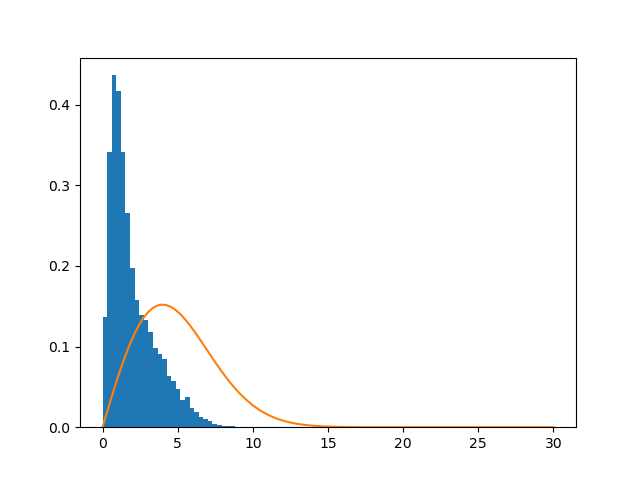

In [ ]:
figure()
hist(total,bins=35,density=True)
plot(np.linspace(0,30,100),syndat.wigner_PDF(np.linspace(0,30,100), 5))